 ### 2d pose estimation using openpose
 - make images from video
 - 2d pose estimation by openpose
 - target video should be at '/openpose/sample_videos'
 - images create at  '/openpose/sample_images'
 - after 2d pose estimation json files create at '/openpose/sample_jsons'

In [1]:
import os
os.chdir('openpose')
!bash video_to_images.sh 24
!bash 2d_estimation.sh
os.chdir('..')

Processing squash1
ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --e

### need ground position for estimation
- click 'left top','left bottom','right bottom','right bottom' in order
- writes 'points' file at directory

In [34]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

<IPython.core.display.Javascript object>


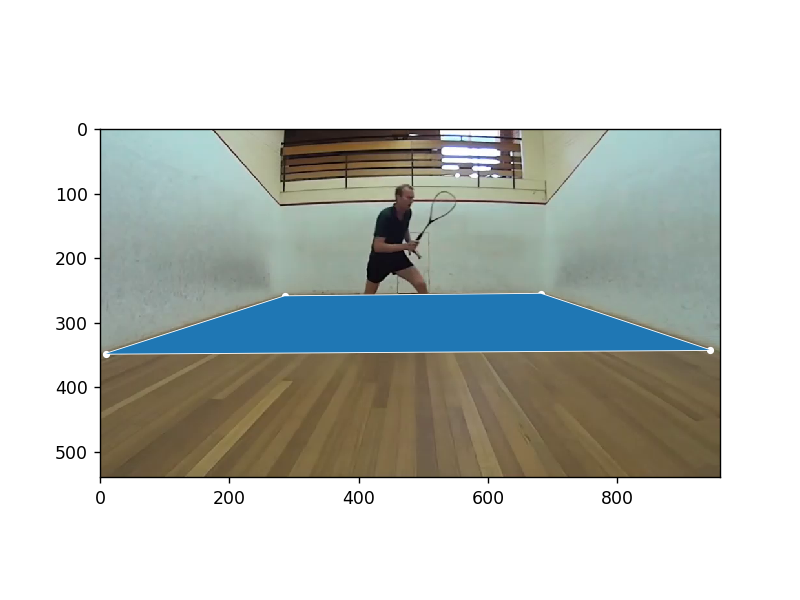

In [42]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import matplotlib.lines as mlines
import ipywidgets as wdg
from IPython.display import display

points = []
prev = []
cnt = 0

a = plt.imread("sample.png")
fig = plt.figure()
plt.imshow(a)

def write():
    global points
    f = open("points",'w+')
    tmp = [str(x)+" "+str(y) for (x,y) in points]
    f.write("\n".join(tmp))
    f.close()

def onclick(event):
    global cnt,points,prev,msg
    if cnt == 4:
        return
    x = float(event.xdata)
    y = float(event.ydata)
    points.append([x,y])
    cnt += 1
    plt.scatter(x,y,s=10,c='white')
    if cnt>1:
            now = [x,y]
            line = plt.Polygon([prev,now], closed=None, fill=None, edgecolor='w')
            plt.gca().add_line(line)
            if cnt == 4:
                line = plt.Polygon([now,points[0]], closed=None, fill=None, edgecolor='w')
                area = plt.Polygon(points,closed=True,fill=True)
                plt.gca().add_line(line)
                plt.gca().add_line(area)
                write()
    prev = [x,y]
    
ka = fig.canvas.mpl_connect('button_press_event',onclick)


### Camera Calibration
- creates ground position information
- you need to enter ratio of the ground (default value: width=3 height=2)

In [5]:
# width height ratio
! python calibration.py 3 2

homography created
crosspoint created


### 3d pose estimation using hmr
- you need to enter number of person to estimate (default value: 1)
- after 3d pose estimation it creates csv files at '/hmr/output/csv', 'hmr/output/csv_joined'

In [2]:
! bash hmr/mong_3dpose_estimate.sh 1

Processing squash1001
N: 1
1
2019-07-30 14:04:06.164509: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:04:06.164543: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:04:06.164562: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:04:06.164578: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:04:06.164590: W tensorflow/core/platform/cpu_feature_guard.cc:45] 

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1004_00.csv

Result is in shun!
Processing squash1005
N: 1
1
2019-07-30 14:04:51.778773: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:04:51.778805: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:04:51.778818: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:04:51.778830: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1008_00.csv

Result is in shun!
Processing squash1009
N: 1
1
2019-07-30 14:05:35.287937: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:05:35.287970: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:05:35.287986: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:05:35.288002: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1012_00.csv

Result is in shun!
Processing squash1013
N: 1
1
2019-07-30 14:06:18.929703: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:06:18.929738: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:06:18.929750: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:06:18.929762: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1016_00.csv

Result is in shun!
Processing squash1017
N: 1
1
2019-07-30 14:07:02.714723: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:07:02.714753: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:07:02.714763: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:07:02.714771: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1020_00.csv

Result is in shun!
Processing squash1021
N: 1
1
2019-07-30 14:07:46.726811: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:07:46.726842: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:07:46.726856: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:07:46.726867: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1024_00.csv

Result is in shun!
Processing squash1025
N: 1
1
2019-07-30 14:08:30.342359: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:08:30.342389: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:08:30.342399: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:08:30.342411: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1028_00.csv

Result is in shun!
Processing squash1029
N: 1
1
2019-07-30 14:09:14.542907: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:09:14.542940: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:09:14.542960: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:09:14.542977: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1032_00.csv

Result is in shun!
Processing squash1033
N: 1
1
2019-07-30 14:09:59.037980: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:09:59.038012: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:09:59.038022: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:09:59.038031: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1036_00.csv

Result is in shun!
Processing squash1037
N: 1
1
2019-07-30 14:10:43.232626: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:10:43.232659: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:10:43.232680: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:10:43.232695: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1040_00.csv

Result is in shun!
Processing squash1041
N: 1
1
2019-07-30 14:11:27.918899: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:11:27.918933: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:11:27.918946: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:11:27.918963: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1044_00.csv

Result is in shun!
Processing squash1045
N: 1
1
2019-07-30 14:12:12.429377: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:12:12.429411: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:12:12.429424: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:12:12.429436: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1048_00.csv

Result is in shun!
Processing squash1049
N: 1
1
2019-07-30 14:12:56.917281: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:12:56.917314: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:12:56.917327: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:12:56.917339: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1052_00.csv

Result is in shun!
Processing squash1053
N: 1
1
2019-07-30 14:13:41.631621: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:13:41.631652: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:13:41.631662: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:13:41.631670: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1056_00.csv

Result is in shun!
Processing squash1057
N: 1
1
2019-07-30 14:14:26.505916: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:14:26.505946: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:14:26.505956: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:14:26.505964: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1060_00.csv

Result is in shun!
Processing squash1061
N: 1
1
2019-07-30 14:15:11.430981: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:15:11.431016: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:15:11.431029: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:15:11.431045: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1064_00.csv

Result is in shun!
Processing squash1065
N: 1
1
2019-07-30 14:15:56.330634: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:15:56.330667: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:15:56.330690: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:15:56.330705: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1068_00.csv

Result is in shun!
Processing squash1069
N: 1
1
2019-07-30 14:16:41.182783: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:16:41.182817: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:16:41.182831: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:16:41.182848: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1072_00.csv

Result is in shun!
Processing squash1073
N: 1
1
2019-07-30 14:17:26.588494: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:17:26.588528: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:17:26.588543: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:17:26.588556: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1076_00.csv

Result is in shun!
Processing squash1077
N: 1
1
2019-07-30 14:18:11.928259: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:18:11.928289: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:18:11.928305: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:18:11.928318: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1080_00.csv

Result is in shun!
Processing squash1081
N: 1
1
2019-07-30 14:18:57.208687: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:18:57.208717: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:18:57.208730: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:18:57.208741: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1084_00.csv

Result is in shun!
Processing squash1085
N: 1
1
2019-07-30 14:19:42.836216: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:19:42.836248: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:19:42.836258: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:19:42.836269: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1088_00.csv

Result is in shun!
Processing squash1089
N: 1
1
2019-07-30 14:20:28.505954: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:20:28.505985: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:20:28.506001: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:20:28.506013: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1092_00.csv

Result is in shun!
Processing squash1093
N: 1
1
2019-07-30 14:21:13.733278: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:21:13.733310: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:21:13.733324: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:21:13.733336: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1096_00.csv

Result is in shun!
Processing squash1097
N: 1
1
2019-07-30 14:21:59.541299: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:21:59.541336: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:21:59.541358: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:21:59.541373: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1100_00.csv

Result is in shun!
Processing squash1101
N: 1
1
2019-07-30 14:22:45.602698: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:22:45.602730: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:22:45.602741: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:22:45.602752: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1104_00.csv

Result is in shun!
Processing squash1105
N: 1
1
2019-07-30 14:23:31.609110: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:23:31.609149: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:23:31.609162: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:23:31.609173: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1108_00.csv

Result is in shun!
Processing squash1109
N: 1
1
2019-07-30 14:24:17.775843: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:24:17.775876: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:24:17.775907: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:24:17.775923: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1112_00.csv

Result is in shun!
Processing squash1113
N: 1
1
2019-07-30 14:25:04.176179: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:25:04.176210: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:25:04.176227: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:25:04.176245: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1116_00.csv

Result is in shun!
Processing squash1117
N: 1
1
2019-07-30 14:25:50.652450: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:25:50.652482: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:25:50.652492: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:25:50.652503: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1120_00.csv

Result is in shun!
Processing squash1121
N: 1
1
2019-07-30 14:26:36.952748: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:26:36.952793: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:26:36.952806: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:26:36.952818: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1124_00.csv

Result is in shun!
Processing squash1125
N: 1
1
2019-07-30 14:27:23.613619: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:27:23.613649: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:27:23.613662: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2019-07-30 14:27:23.613673: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn'

Iteration 0
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint /home/ubuntu/myproj/hmr/src/../models/model.ckpt-667589..
hmr/output/csv/squash1128_00.csv

Result is in shun!
Done


### Make bvh file using blender
- you need to enter number of person to estimate (default value: 1)
- you need to enter the name of bvh file

In [ ]:
# -- [number of people] [output filename]
blender --background hmr/csv_to_bvh.blend -noaudio -P hmr/mong_csv_to_bvh.py -- 1 squash1
